# Building A Handwritten Digits Classifier

## Introduction to the Image Data

In [1]:
from sklearn.datasets import load_digits
d = load_digits()
d.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
import pandas as pd
data = d['data']
data = pd.DataFrame(data)



In [3]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


In [4]:
labels = pd.Series(d['target'])
labels.head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

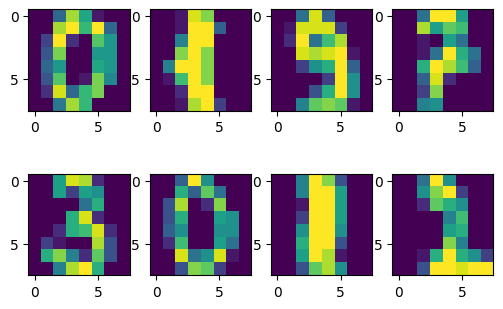

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, axs = plt.subplots(nrows = 2,ncols = 4)
axs[0,0].imshow(data.iloc[0].values.reshape(8,8))
axs[0,1].imshow(data.iloc[99].values.reshape(8,8))
axs[0,2].imshow(data.iloc[199].values.reshape(8,8))
axs[0,3].imshow(data.iloc[299].values.reshape(8,8))
axs[1,0].imshow(data.iloc[999].values.reshape(8,8))
axs[1,1].imshow(data.iloc[1099].values.reshape(8,8))
axs[1,2].imshow(data.iloc[1199].values.reshape(8,8))
axs[1,3].imshow(data.iloc[1299].values.reshape(8,8))

## K-Nearest Neighbors Model

Split up the data into train and test sets.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import numpy as np
# limit = round(len(data)/2)
# rand_index = np.random.permutation(data.index)
# data = data.loc[rand_index]
# train = data.iloc[:limit]
# test = data.iloc[limit:]
# test.shape

Setup a pipeline for testing and training k-nn models.

In [7]:
def train(knn, train_features, train_labels):
    k_model = KNeighborsClassifier(n_neighbors = knn)
    k_model.fit(train_features, train_labels)
    return k_model

def test(k_model, test_features, test_labels):
    pred = k_model.predict(test_features)
    predictions_df = pd.DataFrame()
    predictions_df['Real'] = test_labels
    predictions_df['Progn'] = pred
    predictions_df['Bool'] = test_labels == pred
    sum_correct_predictions = sum(predictions_df['Real']==predictions_df['Progn'])
#     return sum_correct_predictions/len(predictions_df)
    return  predictions_df['Bool'].sum()/len(predictions_df)


def cross_validate(k):
    differences = []
    cross_valid = KFold(n_splits =4, shuffle = True, random_state = 2)
    for train_index, test_index in cross_valid.split(data):
        train_features = data.iloc[train_index]
        train_labels = labels.iloc[train_index]
        test_features = data.iloc[test_index]
        test_labels = labels.iloc[test_index]
        
        k_mod = train(k, train_features, train_labels)
        pred_diff = test(k_mod, test_features, test_labels)
        differences.append(pred_diff)
    return differences

In [8]:
k1_accuracies = cross_validate(1)
np.mean(k1_accuracies)

0.9888728037614452

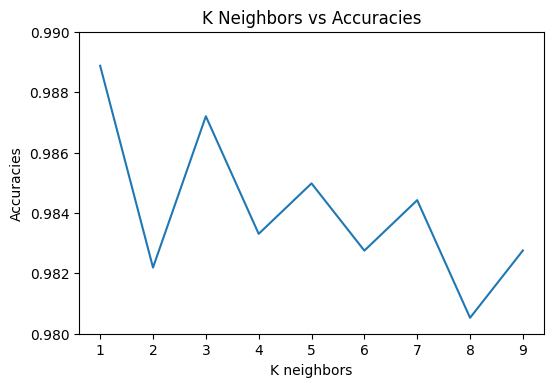

In [9]:
accur = []
for i in range(1,10):
    k1_accuracies = cross_validate(i)
    accur.append(np.mean(k1_accuracies))
plt.plot(range(1,10), accur)
plt.title('K Neighbors vs Accuracies')
plt.xlabel('K neighbors')
plt.ylabel('Accuracies')
plt.ylim([0.98,0.99])
plt.show()

## Neural Network With One Hidden Layer

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

Train set results: {8: 0.9675387276704579, 16: 0.9935071121890826, 32: 0.9998144023756496, 64: 1.0, 128: 1.0, 256: 1.0}
Test set results: {8: 0.9248713189804504, 16: 0.9482553823311062, 32: 0.9599418460777035, 64: 0.9682826033160109, 128: 0.9699554565701559, 256: 0.9816406829992577}


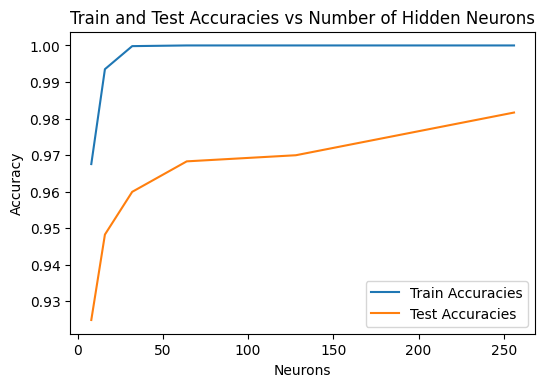

In [10]:
from sklearn.neural_network import MLPClassifier

kfolds = KFold(n_splits = 4, 
               shuffle = True, 
               random_state = 2)
accuracy_results_train = {}
accuracy_results_test = {}

for i in range(6):
    num_neur = 8*(2**(i))
    neur_net = MLPClassifier(hidden_layer_sizes = num_neur)
    kfold_accuracies_train = []
    kfold_accuracies_test = []
    for train_ind, test_ind in kfolds.split(data):
        train_feat = data.iloc[train_ind]
        train_labels = labels.iloc[train_ind]
        test_feat = data.iloc[test_ind]
        test_labels = labels.iloc[test_ind]
        neur_net.fit(train_feat, train_labels)
        pred_train = neur_net.predict(train_feat)
        pred_test = neur_net.predict(test_feat)
        train_bool = pred_train==train_labels
        test_bool = pred_test == test_labels
        kfold_accuracies_train.append(sum(train_bool)/len(train_feat))
        kfold_accuracies_test.append(sum(test_bool)/len(test_feat))
    accuracy_results_train[num_neur] = np.mean(kfold_accuracies_train)
    accuracy_results_test[num_neur] = np.mean(kfold_accuracies_test)
print('Train set results:', accuracy_results_train)
print('Test set results:', accuracy_results_test)
plt.plot(list(accuracy_results_train.keys()), list(accuracy_results_train.values()), label = 'Train Accuracies')
plt.plot(list(accuracy_results_train.keys()), list(accuracy_results_test.values()), label = 'Test Accuracies')
plt.legend()
plt.title('Train and Test Accuracies vs Number of Hidden Neurons')
plt.xlabel("Neurons")
plt.ylabel('Accuracy')
# plt.ylim()
plt.show()

**Summary:**
It looks like adding more neurons to the single hidden layer improved simple accuracy. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Also adding more neurons seems to reduce the overfitting problem as the difference between results, based on Train data and those based on Test data gets smaller with the increase of neurons.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any significant advantages to using a single hidden layer neural network for this problem.

## Neural Network With Two Hidden Layers

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

Train set results: {8: 0.9575216879360443, 16: 0.9979593899180287, 32: 1.0, 64: 1.0, 128: 1.0, 256: 1.0}
Test set results: {8: 0.903173719376392, 16: 0.9460418213313535, 32: 0.9566010888393961, 64: 0.972731997030438, 128: 0.978859193268993, 256: 0.9760814154912151}


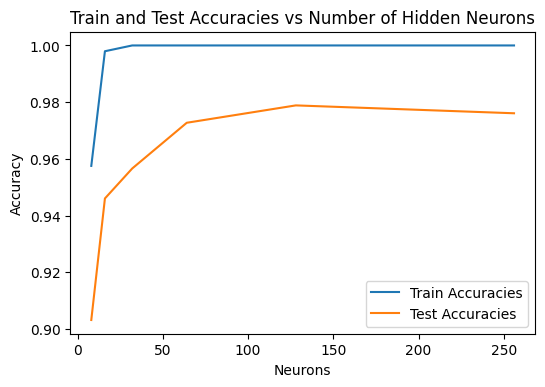

In [11]:
from sklearn.neural_network import MLPClassifier

kfolds = KFold(n_splits = 4, 
               shuffle = True, 
               random_state = 2)
accuracy_results_train = {}
accuracy_results_test = {}

for i in range(6):
    num_neur = 8*(2**(i))
    neur_net = MLPClassifier(hidden_layer_sizes = (num_neur, num_neur))
    kfold_accuracies_train = []
    kfold_accuracies_test = []
    for train_ind, test_ind in kfolds.split(data):
        train_feat = data.iloc[train_ind]
        train_labels = labels.iloc[train_ind]
        test_feat = data.iloc[test_ind]
        test_labels = labels.iloc[test_ind]
        neur_net.fit(train_feat, train_labels)
        pred_train = neur_net.predict(train_feat)
        pred_test = neur_net.predict(test_feat)
        train_bool = pred_train==train_labels
        test_bool = pred_test == test_labels
        kfold_accuracies_train.append(sum(train_bool)/len(train_feat))
        kfold_accuracies_test.append(sum(test_bool)/len(test_feat))
    accuracy_results_train[num_neur] = np.mean(kfold_accuracies_train)
    accuracy_results_test[num_neur] = np.mean(kfold_accuracies_test)
print('Train set results:', accuracy_results_train)
print('Test set results:', accuracy_results_test)
plt.plot(list(accuracy_results_train.keys()), list(accuracy_results_train.values()), label = 'Train Accuracies')
plt.plot(list(accuracy_results_train.keys()), list(accuracy_results_test.values()), label = 'Test Accuracies')
plt.legend()
plt.title('Train and Test Accuracies vs Number of Hidden Neurons')
plt.xlabel("Neurons")
plt.ylabel('Accuracy')
# plt.ylim()
plt.show()

## Neural Network With Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

Train set results: {8: 0.9640468446163949, 16: 0.9996662216288383, 32: 1.0, 64: 1.0, 128: 1.0, 256: 1.0}
Test set results: {8: 0.9171070234113712, 16: 0.960503530286139, 32: 0.9705128205128206, 64: 0.9749721293199554, 128: 0.9805258268301746, 256: 0.9794258639910813}


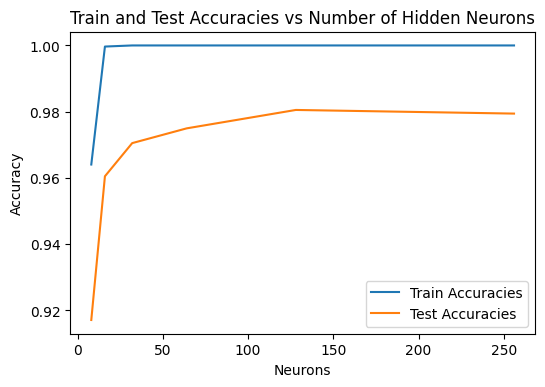

In [13]:
from sklearn.neural_network import MLPClassifier

kfolds = KFold(n_splits = 6, 
               shuffle = True, 
               random_state = 2)
accuracy_results_train = {}
accuracy_results_test = {}

for i in range(6):
    num_neur = 8*(2**(i))
    neur_net = MLPClassifier(hidden_layer_sizes = (num_neur, num_neur, num_neur))
    kfold_accuracies_train = []
    kfold_accuracies_test = []
    for train_ind, test_ind in kfolds.split(data):
        train_feat = data.iloc[train_ind]
        train_labels = labels.iloc[train_ind]
        test_feat = data.iloc[test_ind]
        test_labels = labels.iloc[test_ind]
        neur_net.fit(train_feat, train_labels)
        pred_train = neur_net.predict(train_feat)
        pred_test = neur_net.predict(test_feat)
        train_bool = pred_train==train_labels
        test_bool = pred_test == test_labels
        kfold_accuracies_train.append(sum(train_bool)/len(train_feat))
        kfold_accuracies_test.append(sum(test_bool)/len(test_feat))
    accuracy_results_train[num_neur] = np.mean(kfold_accuracies_train)
    accuracy_results_test[num_neur] = np.mean(kfold_accuracies_test)
print('Train set results:', accuracy_results_train)
print('Test set results:', accuracy_results_test)
plt.plot(list(accuracy_results_train.keys()), list(accuracy_results_train.values()), label = 'Train Accuracies')
plt.plot(list(accuracy_results_train.keys()), list(accuracy_results_test.values()), label = 'Test Accuracies')
plt.legend()
plt.title('Train and Test Accuracies vs Number of Hidden Neurons')
plt.xlabel("Neurons")
plt.ylabel('Accuracy')
# plt.ylim()
plt.show()